<a href="https://colab.research.google.com/github/morekaccino/research/blob/master/case1354.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and prerequisites

In [ ]:
!pip install pandapower

In [3]:
import sys

import numpy as np
import pandas as pd
from sklearn import preprocessing
import sklearn as sk
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandapower as pp
import pandapower.networks as pn

# Dark theme for the graphs. Only should be used on Jupyter not google Colab.
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)


print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.4.1
Keras Version: 2.4.0

Python 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
Pandas 1.1.5
Scikit-Learn 0.22.2.post1
GPU is NOT AVAILABLE


# Data

Our dataset is divided into three sections:
* line information
* generation
* load

A bus is either a generation bus or a load bus. If a bus is a generation, then its data can be found on the generation section. If it is a load bus, then it is in the load section.

For each case in our dataset, we store the data seperately. This way we can easily browse through them and it is more intuitive. Here is an example for 4 points:<br>
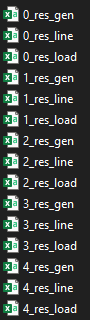

We have a total of 40000 points (cases) in our dataset.

## Line data

First, we need to import the filename of all these datapoints, so we can import them all.

In [ ]:
# importing saved X and Y from multiple files
import os
import glob

res_line = [i for i in glob.glob('E:\\research2020\\Datasets\\case1354\\*_res_line.csv')]
res_gen = [i for i in glob.glob('E:\\research2020\\Datasets\\case1354\\*_res_gen.csv')]
res_load = [i for i in glob.glob('E:\\research2020\\Datasets\\case1354\\*_res_load.csv')]

print('res_line', len(res_line))
print('res_load', len(res_load))
print('res_gen', len(res_gen))

res_line 40000
res_load 40000
res_gen 40000


Next, we concatincate all the lines datapoints together to get X.

In [ ]:
X = pd.concat([pd.read_csv(f) for f in res_line])
X

,Unnamed: 0,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,0,-4.563580e+01,-16.246181,4.563972e+01,16.263207,3.924084e-03,0.017026,0.122532,0.122532,0.122532,1.037489,-41.021537,1.037690,-41.004125,1.225332e-04
1,1,-2.430090e+01,-0.838417,2.431689e+01,0.928529,1.598697e-02,0.090112,0.060979,0.060979,0.060979,1.046446,-47.925790,1.047274,-47.715044,7.284055e+00
2,2,4.770018e-12,0.381312,7.473673e-07,-0.381307,7.473721e-07,0.000006,0.000959,0.000959,0.000959,1.043774,-47.851088,1.043758,-47.850976,9.587281e-07
3,3,-2.417964e+02,-89.172531,2.419189e+02,90.679790,1.225413e-01,1.507258,0.376082,0.376082,0.376082,1.041152,-11.359029,1.043738,-11.054812,3.767566e+01
4,4,2.417964e+02,96.294393,-2.416089e+02,-93.938551,1.874675e-01,2.355842,0.379803,0.379803,0.379803,1.041152,-11.359029,1.037003,-11.827453,1.900976e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,1746,1.729112e+02,8.225786,-1.723435e+02,-4.670892,5.677027e-01,3.554894,0.433452,0.433452,0.433452,1.048068,-95.172633,1.043830,-96.343810,4.181454e+01
1747,1747,3.672666e+02,180.066710,-3.654304e+02,-157.304256,1.836192e+00,22.762454,0.604485,0.604485,0.604485,1.028086,-112.933421,0.999973,-115.761531,6.044915e-04
1748,1748,-3.912100e+00,-1.203507,3.912120e+00,1.203668,2.031330e-05,0.000161,0.010374,0.010374,0.010374,1.035445,-118.659840,1.035462,-118.657768,1.037384e-05
1749,1749,-4.597397e+01,-4.685924,4.598076e+01,4.736121,6.796044e-03,0.050196,0.114023,0.114023,0.114023,1.063603,-95.469473,1.063876,-95.408428,1.049486e+01


Loading 40000 csv files from the hard disk is very time-consuming. We save X on the hard disk, so next time we can load only one file huge file (X) instead of 40000 small files.

In [ ]:
X.to_csv('E:\\research2020\\Datasets\\case1354\\all_res_line.csv', index=True)

Next time, we only need to load X instead of running the above codes.

In [ ]:
X = pd.read_csv('E:\\research2020\\Datasets\\case1354\\all_res_line.csv')

From all the columns in X, we actually only need one. Which is called "p_from_mw". Currently the size of X is around 18 GB. In order to reduce the loading time even more, we drop all other columns and only keep the one that we need. Then we save X again. Its new file size is just under 2 GB.

In [ ]:
X = X[['p_from_mw']]
X.to_csv('E:\\research2020\\Datasets\\case1354\\all_res_line_p_from_mw.csv', index=True)
X

,p_from_mw
0,-4.563580e+01
1,-2.430090e+01
2,4.770018e-12
3,-2.417964e+02
4,2.417964e+02
...,...
70039995,1.729112e+02
70039996,3.672666e+02
70039997,-3.912100e+00
70039998,-4.597397e+01


## Generation data

We repeat the same process for the generation data. Here we load all the generation data and concatinate them to make one big file. We call it `Y_gen`.

In [ ]:
Y_gen = pd.concat([pd.read_csv(f) for f in res_gen])
Y_gen

,Unnamed: 0,p_mw,q_mvar
0,0,200.0,21.702525
1,1,38.0,4.259058
2,2,92.0,12.678264
3,3,24.0,11.541603
4,4,1430.0,276.935240
...,...,...,...
254,254,81.0,136.500250
255,255,36.0,210.920866
256,256,27.0,340.193712
257,257,41.0,39.854725


We save `Y_gen`.

In [ ]:
Y_gen.to_csv('E:\\research2020\\Datasets\\case1354\\all_res_gen.csv', index=True)

Next time, we only have to these three lines to load `Y_gen`.

In [ ]:
Y_gen = pd.read_csv('E:\\research2020\\Datasets\\case1354\\all_res_gen.csv')
Y_gen = Y_gen.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
Y_gen

,p_mw,q_mvar
0,200.0,21.702525
1,38.0,4.259058
2,92.0,12.678264
3,24.0,11.541603
4,1430.0,276.935240
...,...,...
10359995,81.0,136.500250
10359996,36.0,210.920866
10359997,27.0,340.193712
10359998,41.0,39.854725


## Load data

Again, we repeat the same process for the load data. We load all the Load data into RAM, and concatinate all of them to make one file, `Y_load`.

In [ ]:
Y_load = pd.concat([pd.read_csv(f) for f in res_load])
Y_load

,Unnamed: 0,p_mw,q_mvar
0,0,211.4000,48.80
1,1,262.2573,23.40
2,2,8.0400,24.70
3,3,280.4880,39.30
4,4,312.8510,54.80
...,...,...,...
616,616,3.4506,1.35
617,617,30.8062,18.60
618,618,56.3130,-61.00
619,619,219.5760,-73.13


Saving `Y_load`

In [ ]:
Y_load.to_csv('E:\\research2020\\Datasets\\case1354\\all_res_load.csv', index=True)

Next time, we only have to these three lines to load `Y_load`.

In [ ]:
Y_load = pd.read_csv('E:\\research2020\\Datasets\\case1354\\all_res_load.csv')
Y_load = Y_load.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
Y_load

,p_mw,q_mvar
0,211.4000,48.80
1,262.2573,23.40
2,8.0400,24.70
3,280.4880,39.30
4,312.8510,54.80
...,...,...
24839995,3.4506,1.35
24839996,30.8062,18.60
24839997,56.3130,-61.00
24839998,219.5760,-73.13


## Preprocessing

The dimension of our dataset needs to be adjusted. The current dimension is:

In [ ]:
print(X.shape)
print(Y_gen.shape)
print(Y_load.shape)

(70040000, 1)
(10360000, 2)
(24840000, 2)


Each line datapoint (trial) has 1751 rows. Right now they are all stacked together and made 40000 * 1751 rows. We need to change the dimension to (40000, 1751).

In [ ]:
x = X
x = np.array(x)
x = x.reshape(40000, 1751)
x

array([[-4.56358000e+01, -2.43009000e+01,  4.77001771e-12, ...,
        -1.92850000e+00, -5.39761613e+01,  2.34065760e+02],
       [-1.14706200e+02, -6.53250000e+00, -5.98879280e-12, ...,
        -7.27320000e+00, -2.69807710e+01,  3.38874122e+02],
       [-6.90704000e+01, -4.96470000e+01,  4.28942992e-12, ...,
        -7.54870000e+00, -2.99893055e+01,  4.36558386e+02],
       ...,
       [-4.56358000e+01, -2.53461000e+01,  3.72898934e-12, ...,
        -9.25680000e+00, -5.69633094e+01,  4.33733574e+02],
       [-1.22106600e+02, -3.47529000e+01,  5.33986744e-12, ...,
        -1.98360000e+00, -4.29863801e+01,  3.32578563e+02],
       [-1.29507000e+01, -3.91950000e+00,  1.51959001e-12, ...,
        -3.91210000e+00, -4.59739685e+01,  2.27460118e+02]])

Each generation datapoint (trial) has 259 rows (indicating 259 generation buses in the system). Currently, the dimension of the dataset for generation is (40000 * 259, 1). This needs to be changed to (40000, 259).

In [ ]:
y_gen = Y_gen['p_mw']
y_gen = np.array(y_gen)
y_gen = y_gen.reshape(40000, 259)
y_gen

array([[200.,  38.,  92., ..., 544.,  92.,   5.],
       [406.,  61.,  92., ..., 104.,  27.,  23.],
       [174.,   3.,   6., ..., 426.,  12.,  14.],
       ...,
       [497., 142.,  39., ..., 807.,  90.,  42.],
       [107., 151.,  41., ..., 560.,  23., 137.],
       [792.,  96.,   8., ...,  27.,  41.,  42.]])

Each load datapoint (trial) has 621 rows (indicating 621 load buses in the system). Currently, the dimension of the dataset for load is (40000 * 621, 1). This needs to be changed to (40000, 621).

In [ ]:
y_load = Y_load['p_mw']
y_load = np.array(y_load)
y_load = y_load.reshape(40000, 621)
y_load

array([[ 211.4   ,  262.2573,    8.04  , ...,   56.9387, 1066.512 ,
         159.7728],
       [ 229.52  ,  318.8226,  127.3   , ...,   26.2794, 1003.776 ,
          24.208 ],
       [  69.46  ,   82.2768,   69.68  , ...,   45.0504,  878.304 ,
         145.248 ],
       ...,
       [   9.06  ,   77.1345,  246.56  , ...,   38.7934, 1129.248 ,
         389.7488],
       [ 152.51  ,   32.5679,  219.76  , ...,   99.4863,  338.7744,
         445.4272],
       [ 105.7   ,  320.5367,  259.96  , ...,   56.313 ,  219.576 ,
         263.8672]])

Currently, We have the information of all the network lines and nodes. In our approach we only need a subset of them. We select a random bus, `bus_n`. The following code collects all the buses that are directly connected to `bus_n`. It also collects only the lines that are connected to `bus_n` or its neighbouring nodes.

In [18]:
# Bus and its neighbours
bus_n = 1000

net = pn.case1354pegase()
pp.runpp(net)
from_bus = net['line']['from_bus'] == bus_n
to_bus = net['line']['to_bus'] == bus_n
indexes = net['line'][from_bus | to_bus]


all_buses = list(set(np.array(indexes[['from_bus', 'to_bus']]).flatten()))
print('Neighbouring buses to bus {}:\n'.format(bus_n), all_buses)
indexes = list(indexes.index)
for bus in all_buses:
    from_bus = net['line']['from_bus'] == bus
    to_bus = net['line']['to_bus'] == bus
    indexes = indexes + list(net['line'][from_bus | to_bus].index)
indexes = list(set(indexes))
print('\nindexes of the lines connected to bus {} or its neghbouring buses {} are:\n'.format(bus_n, all_buses),indexes)
print('\n\nA more detailed view of the collected lines:\n')
print(net['line'].loc[indexes])

Neighbouring buses to bus 1000:
 [609, 1000, 1322, 1266, 306, 83]

indexes of the lines connected to bus 1000 or its neghbouring buses [609, 1000, 1322, 1266, 306, 83] are:
 [1312, 1313, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 586, 587, 436, 1310, 1311]


A more detailed view of the collected lines:

      c_nf_per_km   df  from_bus  ...  to_bus  type  x_ohm_per_km
1312          0.0  1.0      1000  ...    1322    ol       0.76532
1313          0.0  1.0      1000  ...      83    ol       0.75088
1225          0.0  1.0      1266  ...    1028    ol      34.84372
1226          0.0  1.0      1266  ...    1277    ol      35.49352
1227          0.0  1.0      1266  ...    1000    ol       3.69664
1228          0.0  1.0      1266  ...    1000    ol       3.50892
1229          0.0  1.0      1266  ...    1293    ol      32.72104
1230          0.0  1.0      1266  ...    1293    ol      30.29512
1231          0.0  1.0      1266  ...    1228    ol      15.50856
586           0.0  1.0       359  ..

Filtering the lines dataset to only get the described lines. All other lines will be dropped.

In [ ]:
x = x[:, indexes]
print(x)
print(x.shape)

Next, we need to select the bus that we want to estimate its generation or load, `bus_to_predict`. It has to be directly connected to `bus_n`. In other words, it must be present inside the `all_buses` list. The following code determines if the `bus_to_predict` is a generation node or a load node, and then set `y` to be the real value of its generation of load in different trials.

In [ ]:
bus_to_predict = 306
gen = net['gen'].sort_index()
bus = gen['bus'] == bus_to_predict
display(gen[bus])
index = gen[bus].index
y = y_gen[:, index]
y

We define scalers to normalize the input and place everything between 0 and 1.

In [ ]:
df = x#.values #returns a numpy array
x_min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = x_min_max_scaler.fit_transform(df)
x = pd.DataFrame(x_scaled)
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,1741,1742,1743,1744,1745,1746,1747,1748,1749,1750
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.497237,0.502039,0.464023,0.498235,0.501765,0.498307,0.499320,0.500338,0.499134,0.471600,...,0.500807,0.498663,0.525098,0.501278,0.484345,0.479776,0.464655,0.499703,0.500644,0.490966
std,0.289517,0.290247,0.103677,0.191360,0.191360,0.291440,0.292790,0.292533,0.298581,0.104988,...,0.289616,0.163212,0.122289,0.123704,0.163181,0.130285,0.121452,0.290963,0.208696,0.133379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245000,0.250000,0.408232,0.348791,0.350928,0.240506,0.240506,0.240506,0.233333,0.402119,...,0.249497,0.383286,0.442612,0.417556,0.365032,0.389740,0.381257,0.245000,0.346186,0.398486
50%,0.495000,0.500000,0.448420,0.497956,0.502044,0.493671,0.493671,0.506329,0.500000,0.478108,...,0.499323,0.498574,0.524094,0.500978,0.484011,0.479222,0.465032,0.500000,0.499817,0.490132
75%,0.750000,0.755000,0.539959,0.649072,0.651209,0.746835,0.746835,0.759494,0.766667,0.541617,...,0.754486,0.614011,0.607975,0.585027,0.602536,0.569247,0.547814,0.755000,0.653648,0.582613
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Just to get a sense of y, we graph a histogram of its elements. In this particular bus, `bus_to_predict`, All of the values are between 0 and 200 mw.

(array([1601., 1593., 1589., 1654., 1606., 1682., 1604., 1643., 1614.,
        1634., 1618., 1588., 1601., 1557., 1595., 1633., 1560., 1606.,
        1616., 1539., 1570., 1525., 1605., 1584., 1583.]),
 array([  0.  ,   7.96,  15.92,  23.88,  31.84,  39.8 ,  47.76,  55.72,
         63.68,  71.64,  79.6 ,  87.56,  95.52, 103.48, 111.44, 119.4 ,
        127.36, 135.32, 143.28, 151.24, 159.2 , 167.16, 175.12, 183.08,
        191.04, 199.  ]),
 <BarContainer object of 25 artists>)

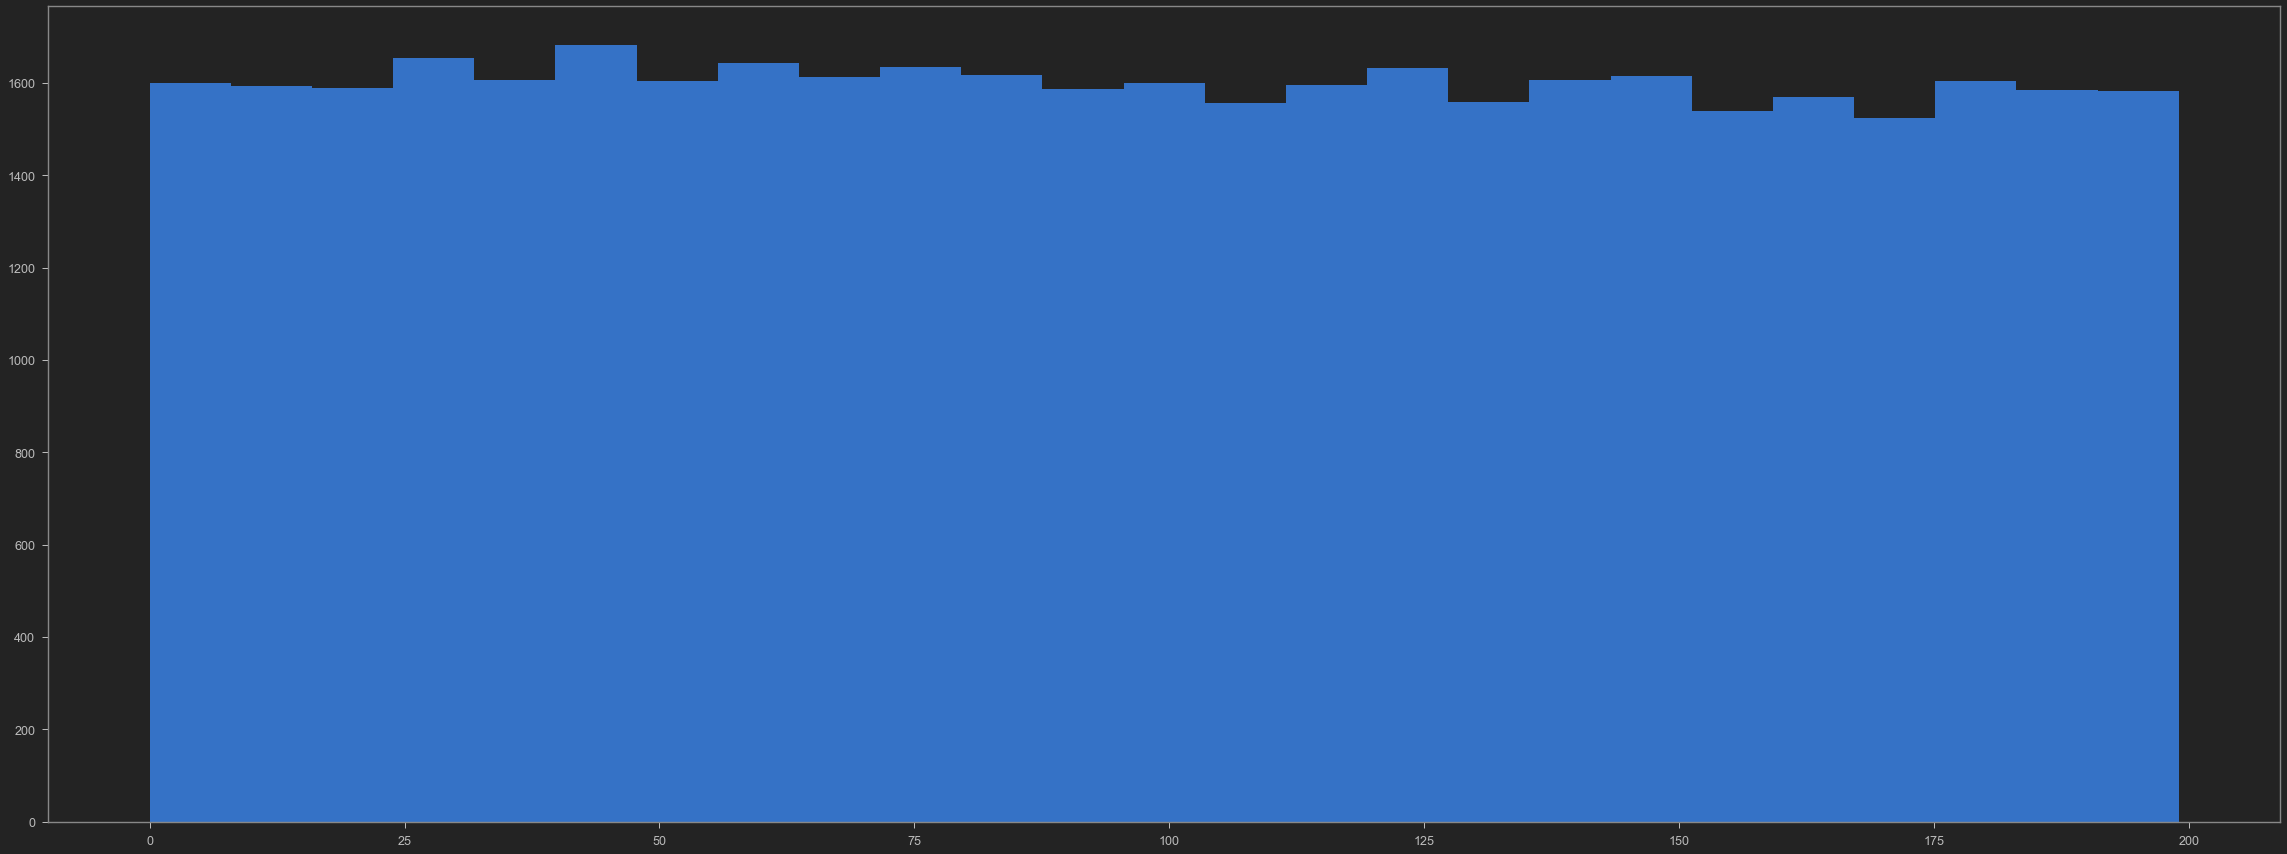

In [ ]:
plt.figure(figsize=(40, 15))
plt.hist(y, bins=25)

We define a scaler to normalize the output, y, and place everything between 0 and 1.

In [ ]:
df = y #returns a numpy array
y_min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = y_min_max_scaler.fit_transform(df)
y = pd.DataFrame(y_scaled)
y.describe()

,0
count,38000.000000
mean,0.499227
std,0.179371
min,0.000000
25%,0.375000
50%,0.500000
75%,0.625000
max,1.000000


So far, we have X and y. From them we need to obtain our testing and training dataset. I used the `sklearn` package to do so. I splitted the data with the ratio of 0.2, meaning that 0.8 * 40000 for training, and 0.2 for testing.

In [ ]:
# partition data to training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Here you can see the current shape and size of the datasets.

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32000, 14)
(8000, 14)
(32000, 1)
(8000, 1)


# Model

Some more imports.

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from MDN import *

I craft my MDN model here. For the input, it takes all the lines connected to `bus_n` and/or its neighbours. Since the model is dynamic, the number of lines might change from bus to bus. So I defined the input layer to have `X_train.shape[1]` neurons. `X_train.shape[1]` indicates the total number of lines that I am working with. The model resembles an ordinary neural network, except for the last layer, the output layer, which is a Mixture Density Network. Except for the input and output layer, each the hidden layer has 512 neurons, indicated by `N_HIDDEN`. The MDN layer has `N_MIXES` * 3 neurons. `N_MIXES` indicates the number of  distributions we want to get at the end. Each distribution has three elements: {mean (μ), standard deviation (σ), mixture weights (π)}

In [ ]:
N_HIDDEN = 512
N_MIXES = 8

model = keras.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, batch_input_shape=(None, X_train.shape[1]), activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(MDN(1, N_MIXES))

model.compile(loss=get_mixture_loss_func(1,N_MIXES), optimizer='adam' , metrics=[get_mixture_mse_accuracy(1,N_MIXES)])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               7680      
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 512)              

Training the model for 1000 epochs, with the batch size of 128.

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_split = 0.2, verbose=1)

Epoch 1/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.7239 - mse_func: 5.9172 - val_loss: 1.7889 - val_mse_func: 3.8323
Epoch 2/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.7884 - mse_func: 6.5960 - val_loss: 3.4992 - val_mse_func: 30.7152
Epoch 3/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.3179 - mse_func: 17.4843 - val_loss: 3.0639 - val_mse_func: 45.6586
Epoch 4/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.8350 - mse_func: 14.4336 - val_loss: 3.1621 - val_mse_func: 21.1074
Epoch 5/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.8385 - mse_func: 8.4560 - val_loss: 1.6996 - val_mse_func: 6.0317
Epoch 6/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.2458 - mse_func: 24.7075 - val_loss: 2.7563 - val_mse_func: 45.0612
Epoch 7/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.0408 - mse_func: 11.3753 - val_loss: 2.0498 - val_m

Epoch 57/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.2737 - mse_func: 18.0814 - val_loss: 2.9027 - val_mse_func: 54.9911
Epoch 58/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.2886 - mse_func: 20.3841 - val_loss: 1.9643 - val_mse_func: 9.5109
Epoch 59/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.8881 - mse_func: 7.0799 - val_loss: 1.9141 - val_mse_func: 9.1353
Epoch 60/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.6525 - mse_func: 3.8840 - val_loss: 2.2259 - val_mse_func: 6.5178
Epoch 61/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.3650 - mse_func: 22.4248 - val_loss: 1.9528 - val_mse_func: 9.1446
Epoch 62/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.9044 - mse_func: 12.6129 - val_loss: 0.9091 - val_mse_func: 1.5312
Epoch 63/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.7848 - mse_func: 5.7703 - val_loss: 0.9899 - v

Epoch 168/1000
200/200 [==============================] - 1s 6ms/step - loss: 3.4583 - mse_func: 288.6803 - val_loss: 2.9895 - val_mse_func: 48.0677
Epoch 169/1000
200/200 [==============================] - 1s 6ms/step - loss: 3.0592 - mse_func: 154.5022 - val_loss: 3.8304 - val_mse_func: 116.5007
Epoch 170/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.4210 - mse_func: 34.2099 - val_loss: 1.9836 - val_mse_func: 8.8884
Epoch 171/1000
200/200 [==============================] - 1s 6ms/step - loss: 3.1523 - mse_func: 75.6898 - val_loss: 3.3372 - val_mse_func: 32.8132
Epoch 172/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.6823 - mse_func: 51.1925 - val_loss: 2.1713 - val_mse_func: 21.5989
Epoch 173/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.7840 - mse_func: 90.8771 - val_loss: 2.6586 - val_mse_func: 53.5540
Epoch 174/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.2407 - mse_func: 21.1581 - val

Epoch 279/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.9598 - mse_func: 107.5213 - val_loss: 2.9310 - val_mse_func: 91.8873
Epoch 280/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.3953 - mse_func: 46.1697 - val_loss: 1.7165 - val_mse_func: 8.7346
Epoch 281/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.8241 - mse_func: 13.1592 - val_loss: 0.9388 - val_mse_func: 1.5366
Epoch 282/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.2104 - mse_func: 17.1527 - val_loss: 1.7380 - val_mse_func: 8.3059
Epoch 283/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.8281 - mse_func: 9.4774 - val_loss: 1.5266 - val_mse_func: 3.6021
Epoch 284/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.8442 - mse_func: 9.1780 - val_loss: 4.2282 - val_mse_func: 13.7325
Epoch 285/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.9563 - mse_func: 10.8799 - val_loss: 

200/200 [==============================] - 1s 6ms/step - loss: 1.5918 - mse_func: 5.4697 - val_loss: 1.5945 - val_mse_func: 7.5358
Epoch 390/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.3600 - mse_func: 3.4360 - val_loss: 0.7007 - val_mse_func: 1.4035
Epoch 391/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.4713 - mse_func: 3.8652 - val_loss: 1.5104 - val_mse_func: 6.9478
Epoch 392/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.7066 - mse_func: 7.2515 - val_loss: 1.9466 - val_mse_func: 2.9861
Epoch 393/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.8575 - mse_func: 10.1211 - val_loss: 1.4038 - val_mse_func: 6.0165
Epoch 394/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.2862 - mse_func: 3.3026 - val_loss: 0.8484 - val_mse_func: 1.5449
Epoch 395/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.5016 - mse_func: 39.1373 - val_loss: 6.3563 - val_mse_func

Epoch 500/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.2148 - mse_func: 21.1660 - val_loss: 1.8002 - val_mse_func: 11.7491
Epoch 501/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.4108 - mse_func: 27.6633 - val_loss: 2.4910 - val_mse_func: 48.1030
Epoch 502/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.9083 - mse_func: 17.6282 - val_loss: 1.2156 - val_mse_func: 5.1379
Epoch 503/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.5905 - mse_func: 7.2869 - val_loss: 1.2587 - val_mse_func: 6.0723
Epoch 504/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.1756 - mse_func: 24.5173 - val_loss: 1.7533 - val_mse_func: 22.5682
Epoch 505/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.6285 - mse_func: 9.2916 - val_loss: 0.9839 - val_mse_func: 4.7911
Epoch 506/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.9795 - mse_func: 11.8338 - val_loss: 

Epoch 556/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.9096 - mse_func: 29.9535 - val_loss: 1.3292 - val_mse_func: 11.3106
Epoch 557/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.9673 - mse_func: 53.9234 - val_loss: 1.8950 - val_mse_func: 48.3043
Epoch 558/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.0068 - mse_func: 18.4009 - val_loss: 2.0914 - val_mse_func: 4.3991
Epoch 559/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.6410 - mse_func: 7.3185 - val_loss: 5.4990 - val_mse_func: 109.0700
Epoch 560/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.8896 - mse_func: 17.9830 - val_loss: 0.8886 - val_mse_func: 1.5767
Epoch 561/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.3247 - mse_func: 17.9354 - val_loss: 2.1870 - val_mse_func: 29.3964
Epoch 562/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.0224 - mse_func: 15.0616 - val_los

Epoch 612/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.0433 - mse_func: 12.1930 - val_loss: 1.7874 - val_mse_func: 6.9304
Epoch 613/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.1289 - mse_func: 2.1864 - val_loss: 0.9002 - val_mse_func: 1.4179
Epoch 614/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.2870 - mse_func: 2.4337 - val_loss: 1.3405 - val_mse_func: 1.8283
Epoch 615/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.3427 - mse_func: 3.0319 - val_loss: 1.5328 - val_mse_func: 3.0900
Epoch 616/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.9537 - mse_func: 9.9903 - val_loss: 1.2460 - val_mse_func: 4.9028
Epoch 617/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.3709 - mse_func: 3.9449 - val_loss: 1.9796 - val_mse_func: 4.8535
Epoch 618/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.3898 - mse_func: 3.0349 - val_loss: 1.2415 

Epoch 668/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.1835 - mse_func: 15.8744 - val_loss: 0.8817 - val_mse_func: 2.8707
Epoch 669/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.3748 - mse_func: 3.3361 - val_loss: 1.1736 - val_mse_func: 4.3003
Epoch 670/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.3958 - mse_func: 4.2363 - val_loss: 0.7209 - val_mse_func: 1.5396
Epoch 671/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.9041 - mse_func: 13.1537 - val_loss: 2.2441 - val_mse_func: 20.1257
Epoch 672/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.1263 - mse_func: 16.8730 - val_loss: 1.7281 - val_mse_func: 18.0399
Epoch 673/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.5775 - mse_func: 10.3952 - val_loss: 1.0868 - val_mse_func: 7.0227
Epoch 674/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.6032 - mse_func: 6.9570 - val_loss: 0.

Epoch 724/1000
200/200 [==============================] - 1s 7ms/step - loss: 1.2142 - mse_func: 2.6731 - val_loss: 3.1830 - val_mse_func: 10.4009
Epoch 725/1000
200/200 [==============================] - 1s 7ms/step - loss: 1.3343 - mse_func: 4.6271 - val_loss: 3.5022 - val_mse_func: 10.1807
Epoch 726/1000
200/200 [==============================] - 1s 7ms/step - loss: 1.3219 - mse_func: 2.8968 - val_loss: 1.7577 - val_mse_func: 2.0796
Epoch 727/1000
200/200 [==============================] - 1s 7ms/step - loss: 1.4507 - mse_func: 3.2872 - val_loss: 1.1328 - val_mse_func: 3.9541
Epoch 728/1000
200/200 [==============================] - 1s 7ms/step - loss: 1.5842 - mse_func: 4.9644 - val_loss: 1.3149 - val_mse_func: 4.8838
Epoch 729/1000
200/200 [==============================] - 1s 7ms/step - loss: 1.7922 - mse_func: 10.3769 - val_loss: 3.9390 - val_mse_func: 42.5327
Epoch 730/1000
200/200 [==============================] - 1s 7ms/step - loss: 1.8863 - mse_func: 12.2805 - val_loss: 0.8

200/200 [==============================] - 1s 6ms/step - loss: 2.3719 - mse_func: 22.3753 - val_loss: 2.2788 - val_mse_func: 25.4114
Epoch 781/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.9677 - mse_func: 14.9086 - val_loss: 1.7303 - val_mse_func: 12.5323
Epoch 782/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.7462 - mse_func: 9.4225 - val_loss: 1.3092 - val_mse_func: 14.9045
Epoch 783/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.8638 - mse_func: 11.4012 - val_loss: 0.9812 - val_mse_func: 3.5370
Epoch 784/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.6433 - mse_func: 5.4190 - val_loss: 1.2398 - val_mse_func: 3.1012
Epoch 785/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.3264 - mse_func: 2.9878 - val_loss: 2.7336 - val_mse_func: 10.9452
Epoch 786/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.9643 - mse_func: 8.5761 - val_loss: 1.0211 - val_mse

200/200 [==============================] - 1s 6ms/step - loss: 1.3664 - mse_func: 3.3240 - val_loss: 2.0702 - val_mse_func: 1.2457
Epoch 837/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.7967 - mse_func: 5.9200 - val_loss: 1.9137 - val_mse_func: 10.6695
Epoch 838/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.1598 - mse_func: 2.9989 - val_loss: 4.8194 - val_mse_func: 28.0926
Epoch 839/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.3692 - mse_func: 4.6874 - val_loss: 0.4123 - val_mse_func: 0.8125
Epoch 840/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.3943 - mse_func: 3.3602 - val_loss: 1.5321 - val_mse_func: 1.6840
Epoch 841/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.0678 - mse_func: 1.6466 - val_loss: 0.1423 - val_mse_func: 0.5090
Epoch 842/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.6958 - mse_func: 4.9703 - val_loss: 0.7791 - val_mse_func

200/200 [==============================] - 1s 6ms/step - loss: 1.6267 - mse_func: 5.7171 - val_loss: 1.4070 - val_mse_func: 6.9022
Epoch 893/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.5682 - mse_func: 24.9488 - val_loss: 2.3533 - val_mse_func: 38.0365
Epoch 894/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.3658 - mse_func: 25.6154 - val_loss: 2.3074 - val_mse_func: 26.4853
Epoch 895/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.5132 - mse_func: 9.6264 - val_loss: 4.2925 - val_mse_func: 13.0061
Epoch 896/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.7608 - mse_func: 6.8316 - val_loss: 0.7585 - val_mse_func: 3.8727
Epoch 897/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.4237 - mse_func: 3.8292 - val_loss: 2.8149 - val_mse_func: 4.2516
Epoch 898/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.0519 - mse_func: 1.6327 - val_loss: 1.5875 - val_mse_f

200/200 [==============================] - 1s 6ms/step - loss: 1.3413 - mse_func: 2.7132 - val_loss: 0.2357 - val_mse_func: 0.6153
Epoch 949/1000
200/200 [==============================] - 1s 6ms/step - loss: 0.9837 - mse_func: 1.3731 - val_loss: 0.3219 - val_mse_func: 0.5375
Epoch 950/1000
200/200 [==============================] - 1s 6ms/step - loss: 0.7536 - mse_func: 0.8216 - val_loss: 0.9241 - val_mse_func: 0.7558
Epoch 951/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.0881 - mse_func: 2.0039 - val_loss: 0.4715 - val_mse_func: 0.7983
Epoch 952/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.3704 - mse_func: 2.9155 - val_loss: 2.1527 - val_mse_func: 10.6224
Epoch 953/1000
200/200 [==============================] - 1s 6ms/step - loss: 1.1466 - mse_func: 2.6157 - val_loss: 1.2065 - val_mse_func: 3.3883
Epoch 954/1000
200/200 [==============================] - 1s 6ms/step - loss: 2.0820 - mse_func: 28.9150 - val_loss: 6.3667 - val_mse_func

After training, we predict the testing dataset with the model. Notice that we want a helper function that can sample from the derived mixture distribution. We use `sample_from_output` for that matter. We take a random sample from the derived mixture distributions of each case, and save the samples (predictions) in `test_prediction`

In [ ]:
OUTPUT_DIMS = 1
prediction = model.predict(X_test)
test_predictions = np.apply_along_axis(sample_from_output, 1, prediction, OUTPUT_DIMS, N_MIXES, temp=1.0)

Here is a graph of the true values vs. the samples from the distributions. The closer the orange dots (samples) are to the diagonal line (y = x), the more accurate is the model.

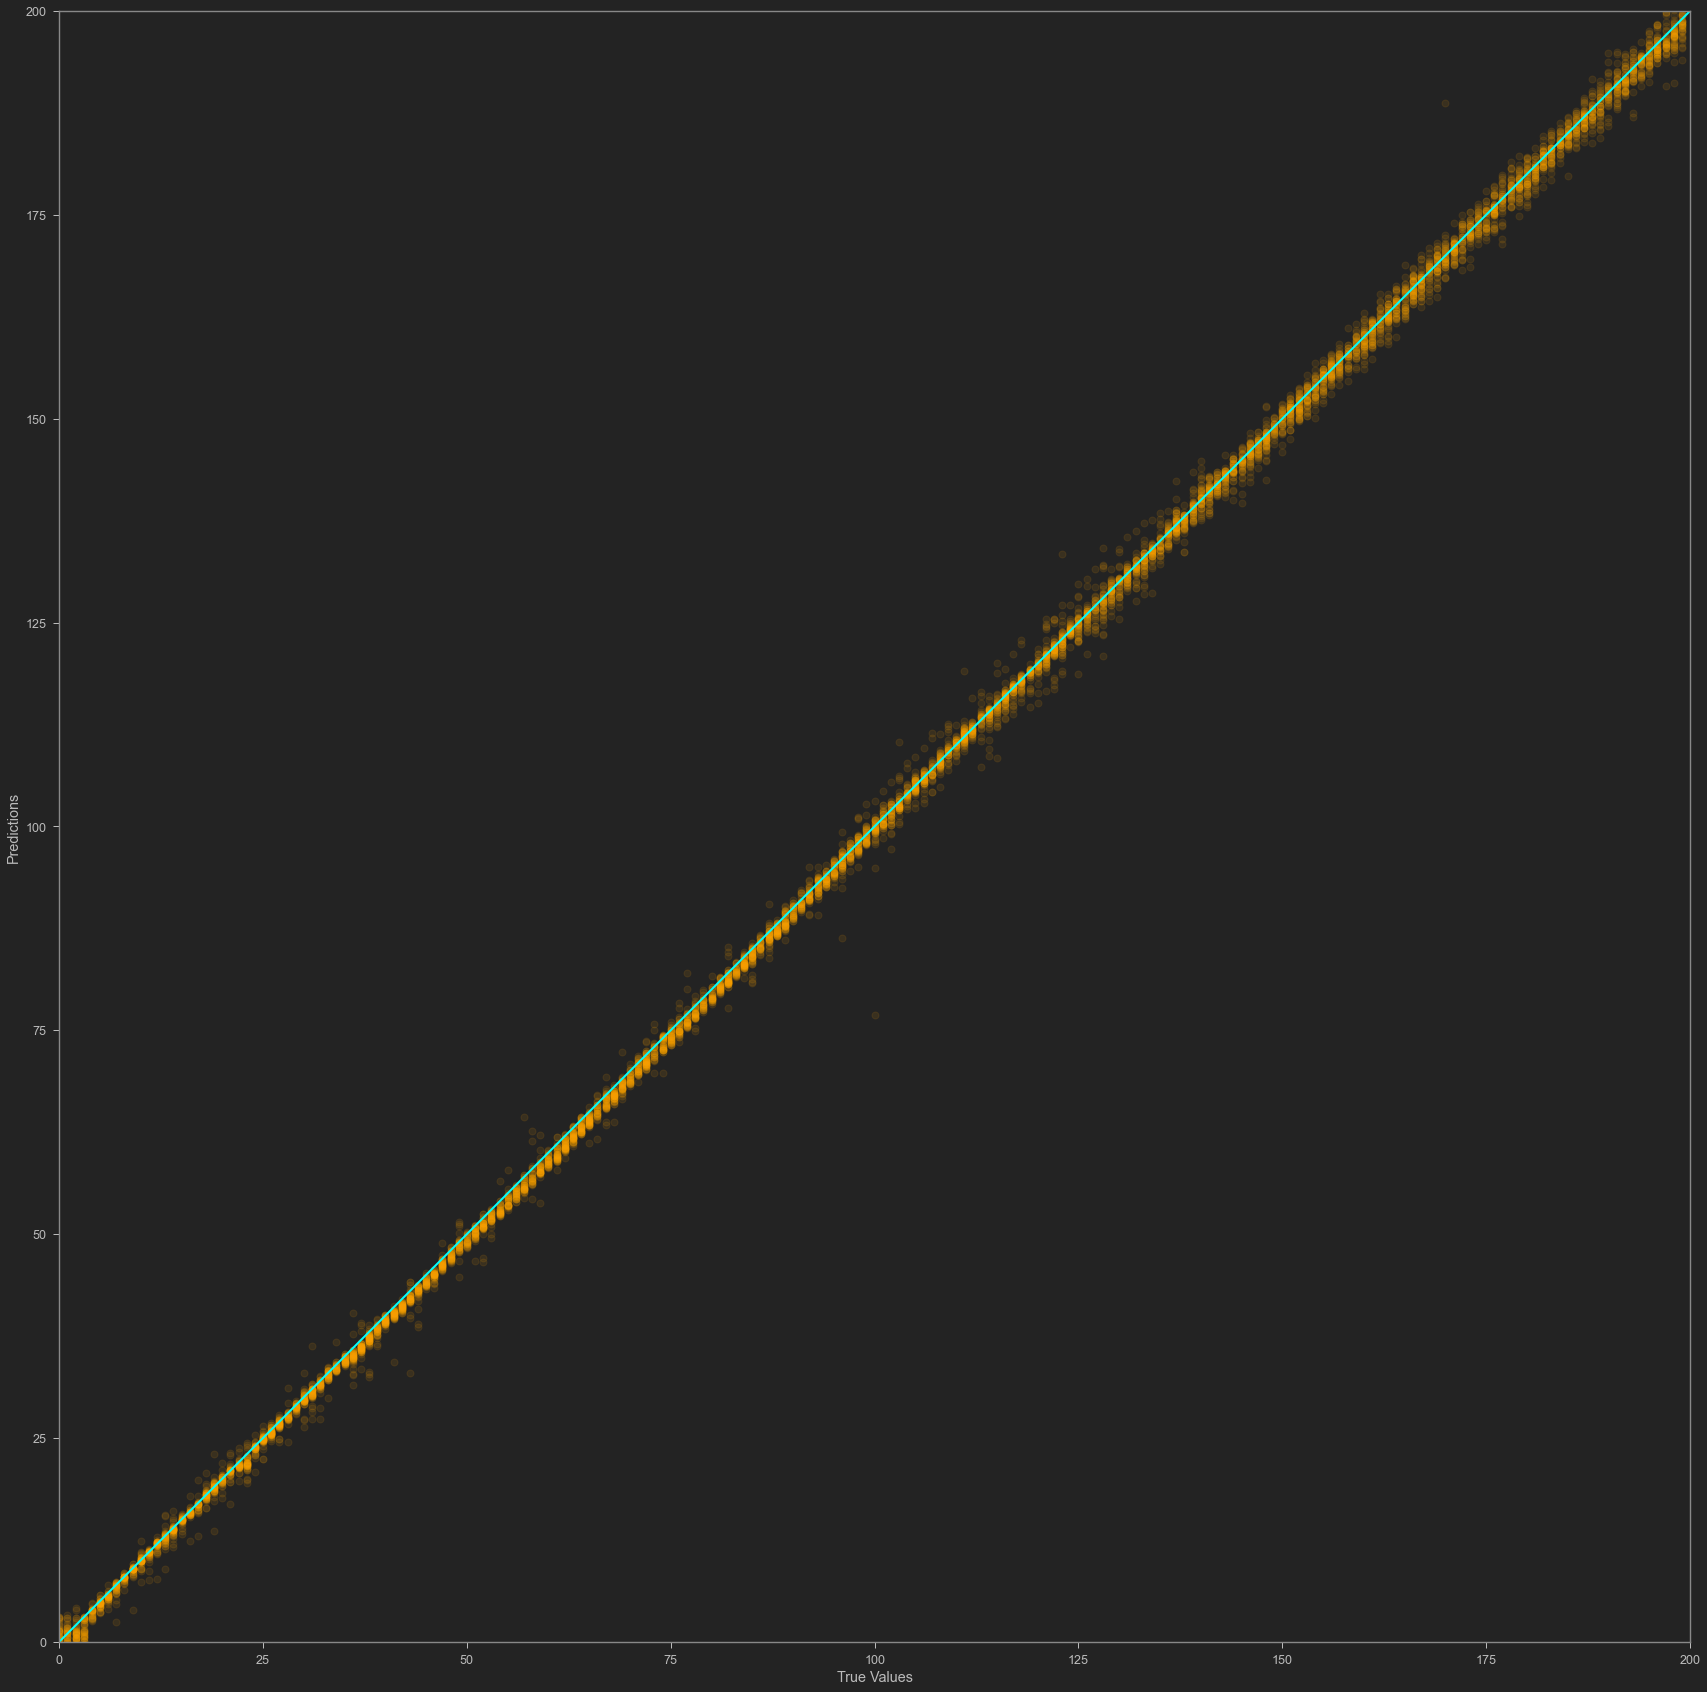

In [ ]:
plt.figure(figsize=(30,30))
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions, alpha=0.1, color='orange', linewidths=1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 200]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, color='cyan', linewidth=2)

And then, we evaluate the model based on the predictions (samples) and the true values. As you can see MSE is 1.6 and MAE is under 1.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, test_predictions.reshape(test_predictions.shape[0], test_predictions.shape[1]))
mae = mean_absolute_error(y_test, test_predictions.reshape(test_predictions.shape[0], test_predictions.shape[1]))
print('mse:', mse)
print('mae:', mae)

mse: 1.6782742769052343
mae: 0.912284292776342


Finally I want to graph the distribution instead of sampling. Again, I predict the testing dataset, `X_test`, and seperate the mean (μ), standard deviation (σ), mixture weights (π) for that matter.

In [ ]:
prediction = model.predict(X_test)

# Split up the mixture parameters
mus = np.apply_along_axis((lambda a: a[:N_MIXES*OUTPUT_DIMS]), 1, prediction)
sigs = np.apply_along_axis((lambda a: a[N_MIXES*OUTPUT_DIMS:2*N_MIXES*OUTPUT_DIMS]), 1, prediction)
pis = np.apply_along_axis((lambda a: softmax(a[-N_MIXES:])), 1, prediction)

# Sample from the predicted distributions
y_samples = np.apply_along_axis(sample_from_output, 1, prediction, OUTPUT_DIMS, N_MIXES, temp=1.0, sigma_temp=1.0)

Here I do some statistical calculation related to the distributionswith the help of the mean (μ), standard deviation (σ), and mixture weights (π).

In [ ]:
temp=.5
sigma_temp=.5
mus, sigs, pi_logits = split_mixture_params(prediction[100], OUTPUT_DIMS, N_MIXES)
pis = softmax(pi_logits, t=1)
m = sample_from_categorical(pis)
# Alternative way to sample from categorical:
# m = np.random.choice(range(len(pis)), p=pis)
mus_vector = mus[m * OUTPUT_DIMS:(m + 1) * OUTPUT_DIMS]
sig_vector = sigs[m * OUTPUT_DIMS:(m + 1) * OUTPUT_DIMS]
scale_matrix = np.identity(OUTPUT_DIMS) * sig_vector  # scale matrix from diag
cov_matrix = np.matmul(scale_matrix, scale_matrix.T)  # cov is scale squared.
cov_matrix = cov_matrix * sigma_temp  # adjust for sigma temperature
print(cov_matrix)
print(mus_vector)

import scipy.stats as ss

def plot_normal(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the normal distribution function for a given x range
    If mu and sigma are not provided, standard normal is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.norm.cdf(x, mu, sigma)
    else:
        y = ss.norm.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)


[[0.7062523]]
[21.921707]


Finally, I randomly pick a datapoint from the testing dataset for illustration purposes. The real value of this datapoint is 22. I then graph the distribution of it. As you can see the model does a good job at finding a reasonable distribution. The mean (μ) of the distribution is almost 22.

[22.]


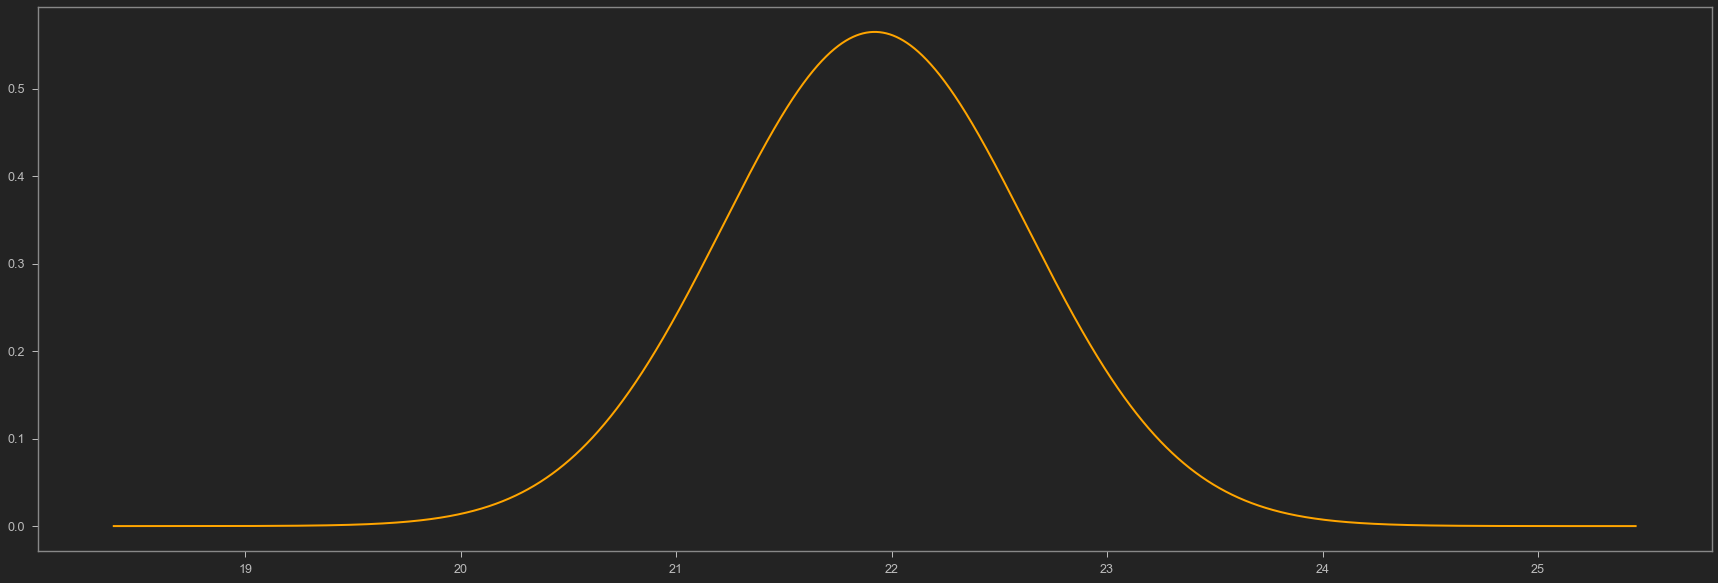

In [ ]:
plt.figure(figsize=(30,10))
x = np.linspace(mus_vector[0] - 5 * cov_matrix[0][0], mus_vector[0] + 5 * cov_matrix[0][0], 5000)
print(y_test[100])
plot_normal(x, mus_vector[0], cov_matrix[0][0], color='orange', lw=2, ls='-', alpha=1)